In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(df.shape)
print('-'*20)
print(df.isnull().sum())
print('-'*20)
print(df.duplicated().sum())

(918, 12)
--------------------
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
--------------------
0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Univariate Analysis

- Numerical Values

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

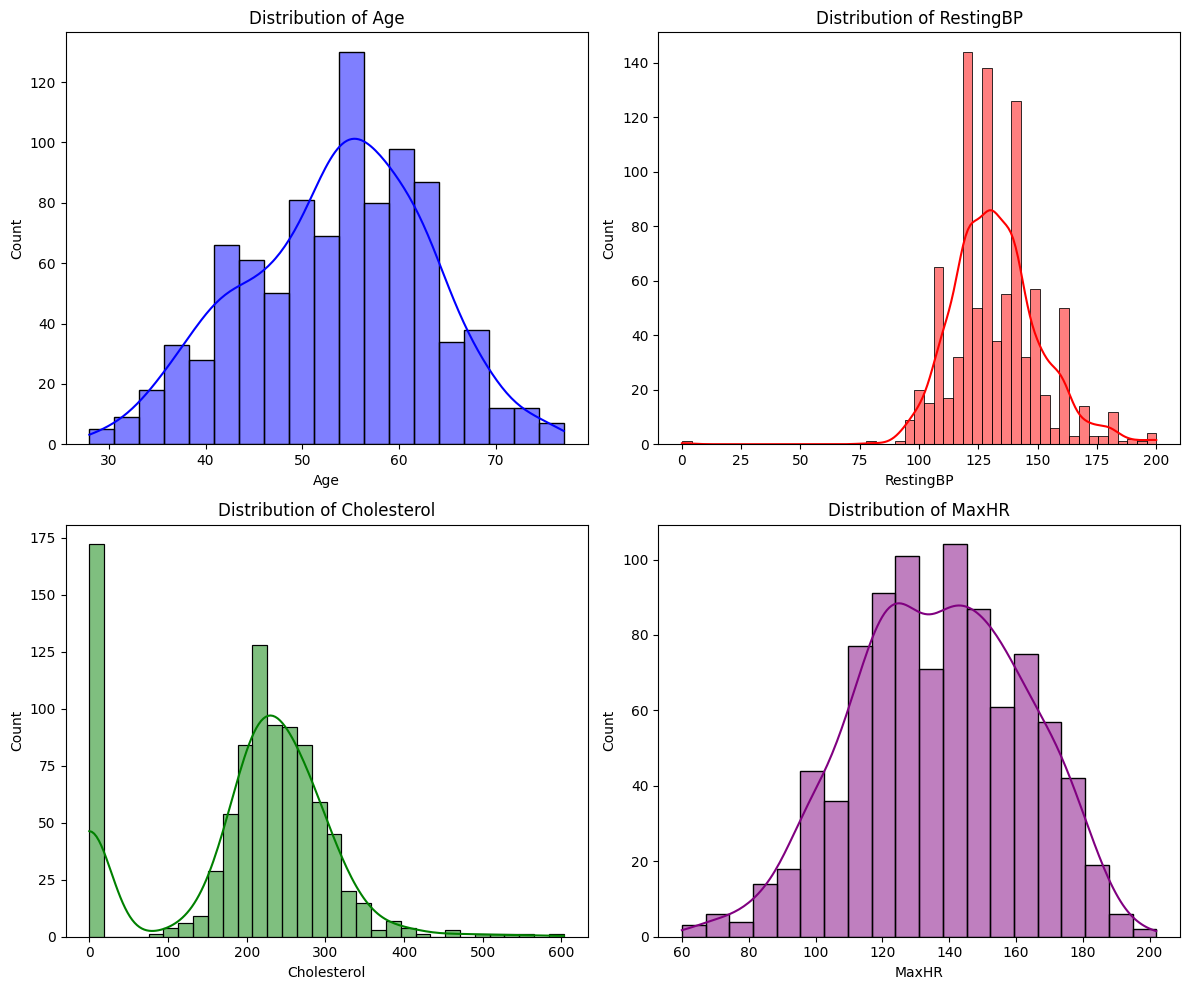

In [6]:
# With loops


# Define features to plot
features = ["Age", "RestingBP", "Cholesterol", "MaxHR"]
colors = ["blue", "red", "green", "purple"]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.flatten()

# Loop through features and plot each one
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()  # Adjust layout
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

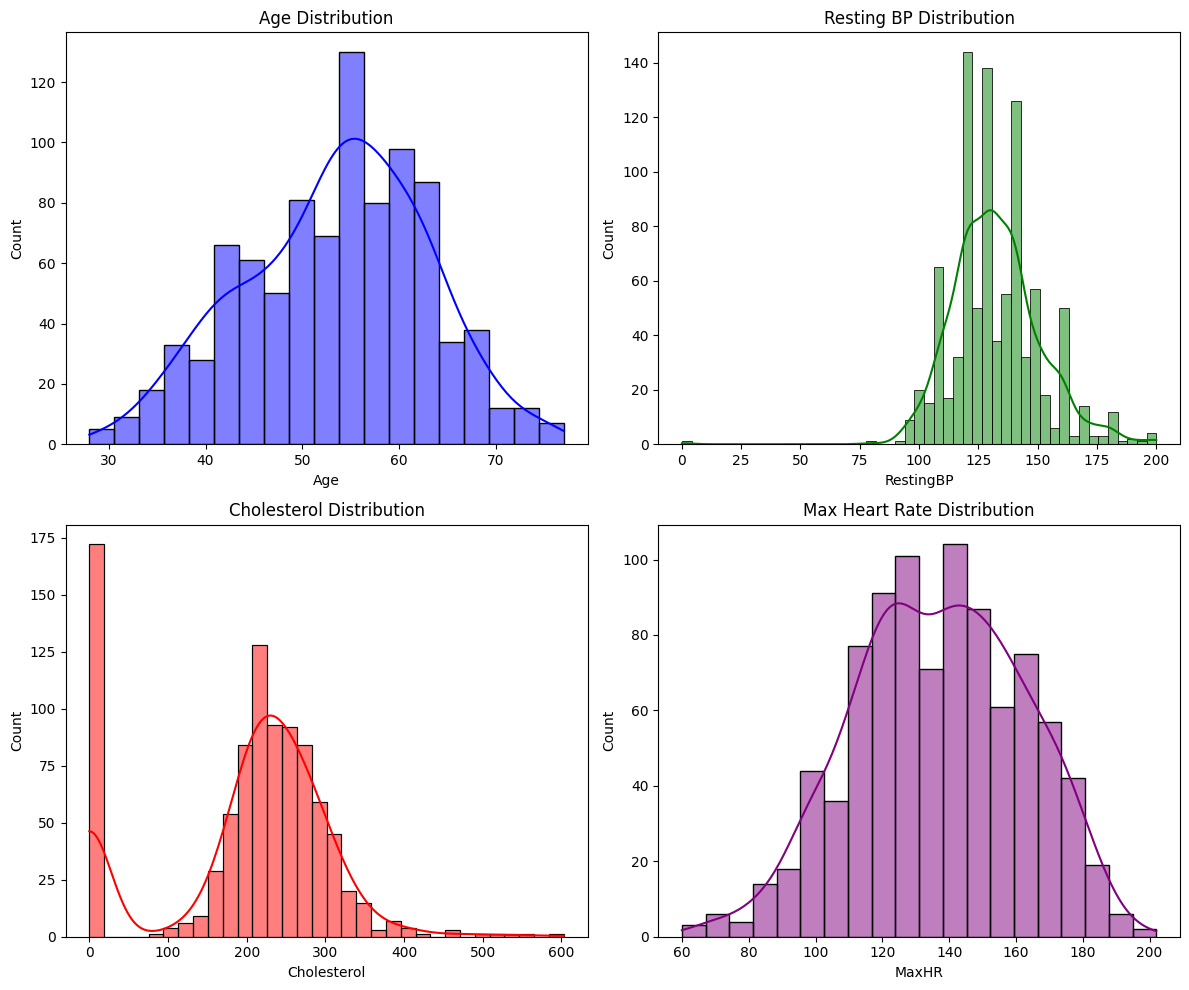

In [7]:
#Without loops

# Create 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Age distribution
sns.histplot(df['Age'], kde=True, color='blue', ax=ax[0, 0])
ax[0, 0].set_title('Age Distribution')

# Resting Blood Pressure distribution
sns.histplot(df['RestingBP'], kde=True, color='green', ax=ax[0, 1])
ax[0, 1].set_title('Resting BP Distribution')

# Cholesterol distribution
sns.histplot(df['Cholesterol'], kde=True, color='red', ax=ax[1, 0])
ax[1, 0].set_title('Cholesterol Distribution')

# Maximum Heart Rate distribution
sns.histplot(df['MaxHR'], kde=True, color='purple', ax=ax[1, 1])
ax[1, 1].set_title('Max Heart Rate Distribution')

plt.tight_layout()
plt.show()


- Categorical Values

<Axes: >

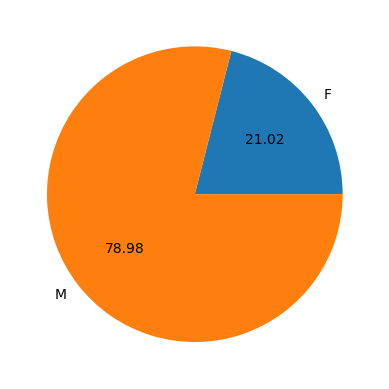

In [8]:
df.groupby('Sex').size().plot(kind="pie",autopct = "%.2f")

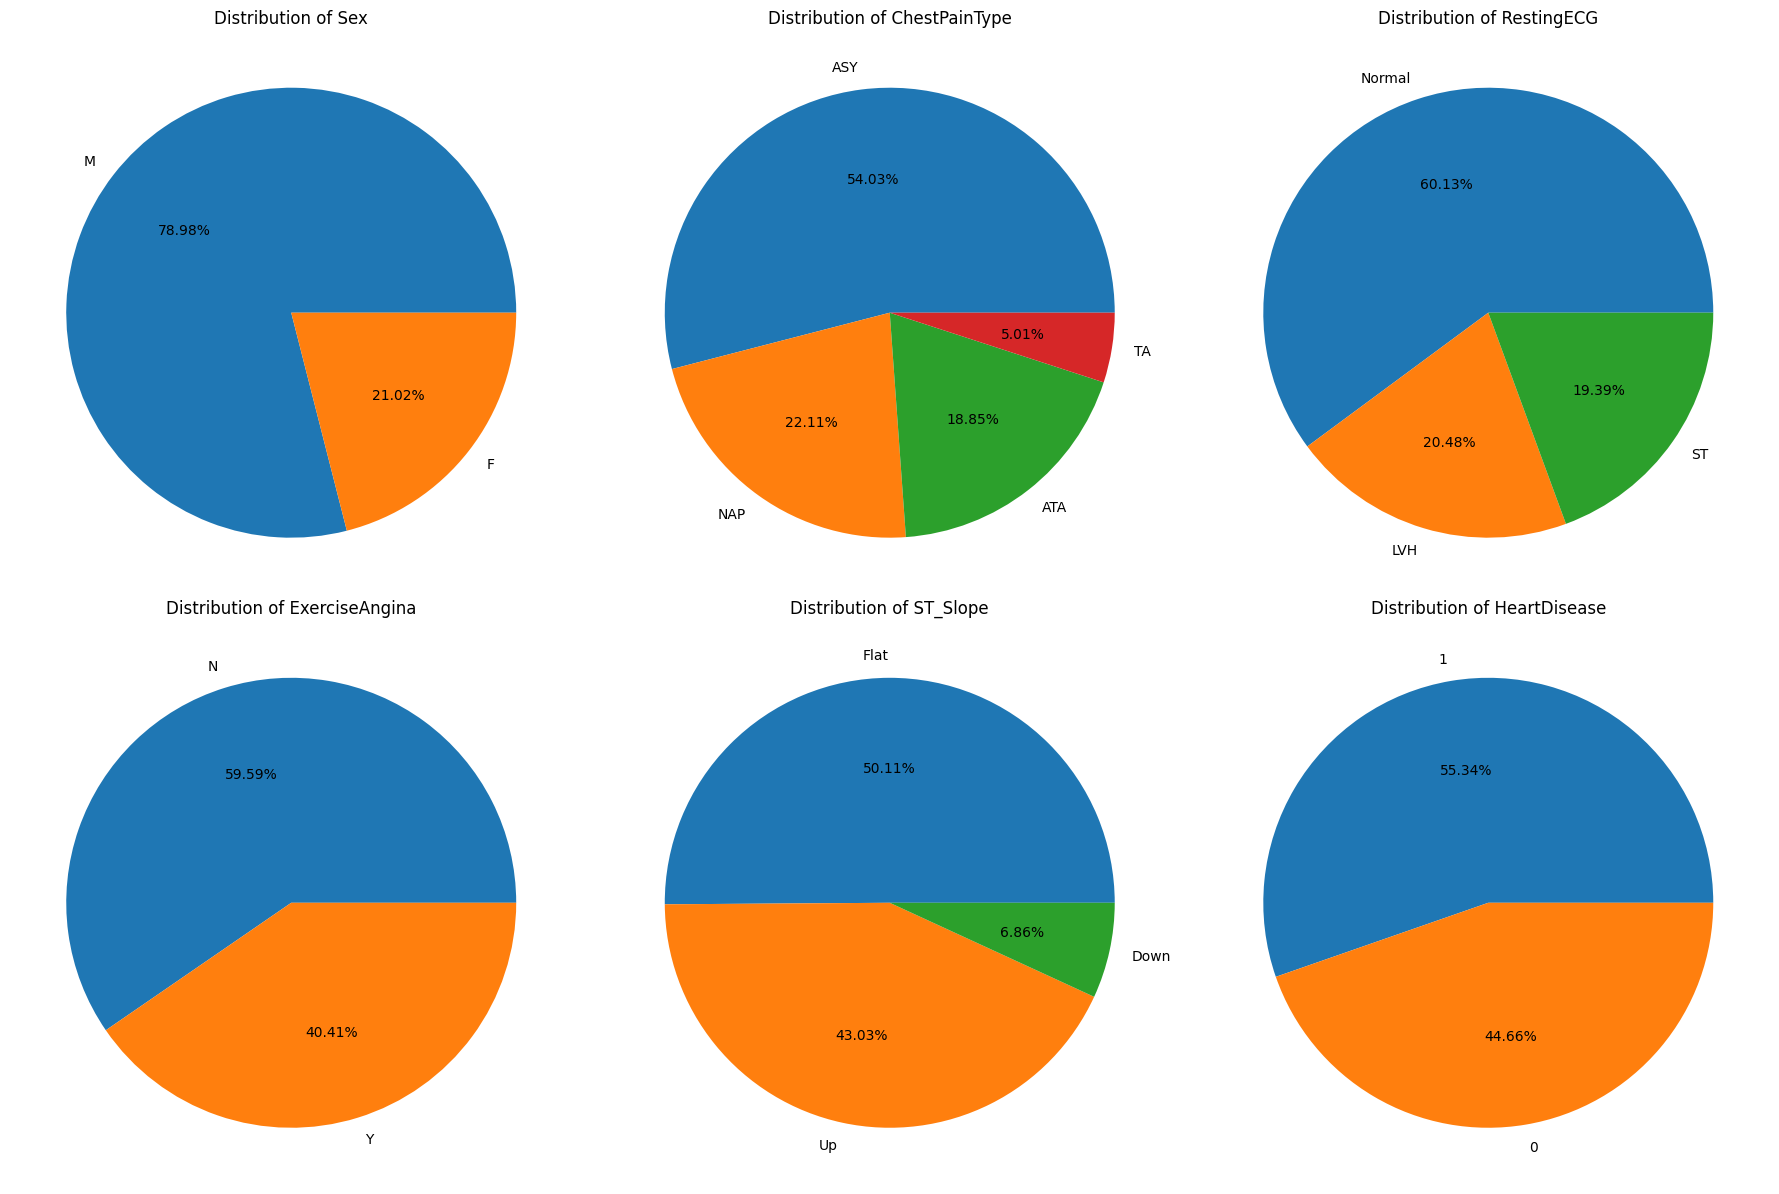

In [9]:
categorical_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

# Create a 2X3 Subplots
fig,axes = plt.subplots(2,3,figsize=(18,12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax,column in zip(axes,categorical_columns):
    # Calculate value counts
    value_counts = df[column].value_counts()
    # Plot pie charts
    ax.pie(value_counts,labels = value_counts.index,autopct="%.2f%%")
    # Set Title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Key Insights

1. **Sex Distribution**  
   - The majority of the patients are **Male (M)** (~79%).
   - A smaller proportion are **Female (F)** (~21%).

2. **Chest Pain Type Distribution**  
   - **Asymptomatic (ASY)** is the most common type (~54%).
   - **Non-Anginal Pain (NAP)** (~22%).
   - **Atypical Angina (ATA)** (~19%).
   - **Typical Angina (TA)** (~5%).

3. **Resting ECG Results Distribution**  
   - Majority have **Normal** ECG (~60%).
   - **Left Ventricular Hypertrophy (LVH)** (~20%).
   - **ST-T wave abnormality (ST)** (~19%).

4. **Exercise-Induced Angina Distribution**  
   - ~60% do **not** experience exercise-induced angina (**N**).
   - ~40% **do** experience exercise-induced angina (**Y**).

5. **ST Slope Distribution**  
   - **Flat** is the most common slope (~50%).
   - **Up-sloping** (~43%).
   - **Down-sloping** (~7%).

6. **Heart Disease Distribution**  
   - ~55% have **Heart Disease (1)**.
   - ~45% are **Normal (0)**.


## Working with Violin Plot

<Axes: xlabel='Age'>

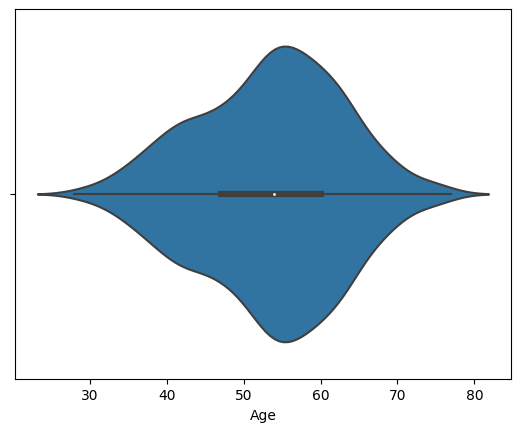

In [10]:
sns.violinplot(x=df["Age"])

<Axes: xlabel='HeartDisease', ylabel='count'>

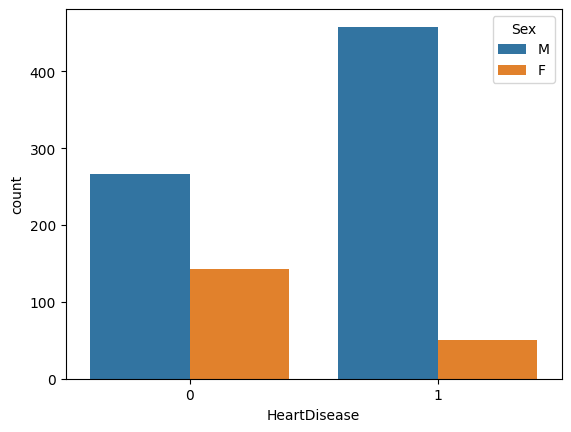

In [11]:
#sns.violinplot(x=df["HeartDisease"],y=df["Sex"])
sns.countplot(x=df["HeartDisease"],hue=df["Sex"])

<Axes: xlabel='HeartDisease', ylabel='Age'>

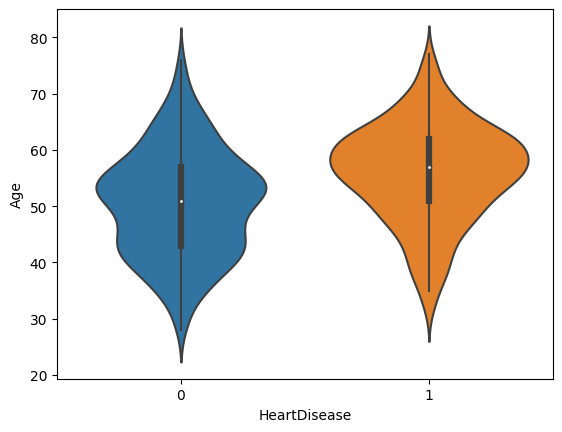

In [12]:
sns.violinplot(y = df['Age'], x = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

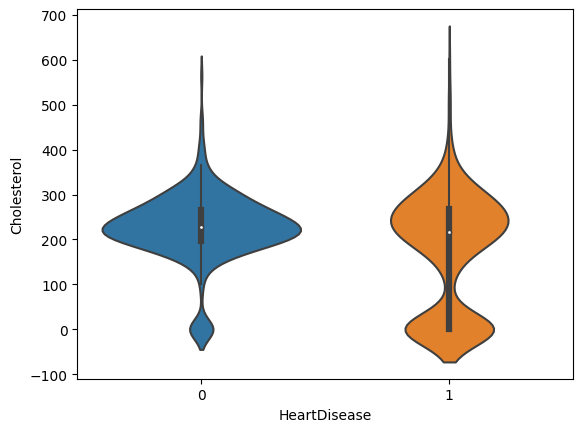

In [13]:
sns.violinplot(y = df['Cholesterol'], x = df['HeartDisease'])

## Correlation 

In [14]:
df.corr(numeric_only = True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


## Key Insights from the Correlation Matrix

1. **Oldpeak vs. HeartDisease (`0.404`)**  
   - Highest positive correlation with heart disease.  
   - Suggests higher ST depression is linked to a higher likelihood of heart disease.

2. **MaxHR vs. HeartDisease (`-0.400`)**  
   - Strongest negative correlation with heart disease.  
   - Indicates lower maximum heart rate is associated with an increased chance of heart disease.

3. **Age vs. HeartDisease (`0.282`)**  
   - Moderate positive correlation.  
   - Suggests older age is somewhat linked to a higher risk of heart disease.

4. **FastingBS vs. HeartDisease (`0.267`)**  
   - Moderate positive correlation.  
   - Higher fasting blood sugar levels may be associated with increased heart disease risk.

5. **Cholesterol vs. HeartDisease (`-0.233`)**  
   - Slight negative correlation.  
   - Potentially counterintuitive; may be due to confounding factors (e.g., medication, sample bias).

6. **RestingBP vs. HeartDisease (`0.108`)**  
   - Weak positive correlation.

7. **Notable Feature Interactions**  
   - **Age and MaxHR** are negatively correlated (`-0.382`), reflecting the natural decline in max heart rate with age.
   - **FastingBS and Cholesterol** are negatively correlated (`-0.261`), indicating complex metabolic or treatment-related factors.

> **Note**: Correlation does not imply causation. These values only show linear relationships within this specific dataset.


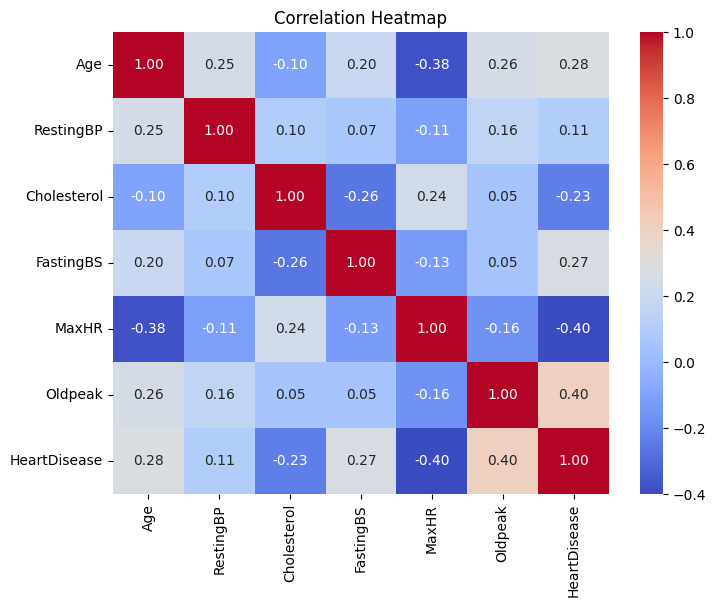

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

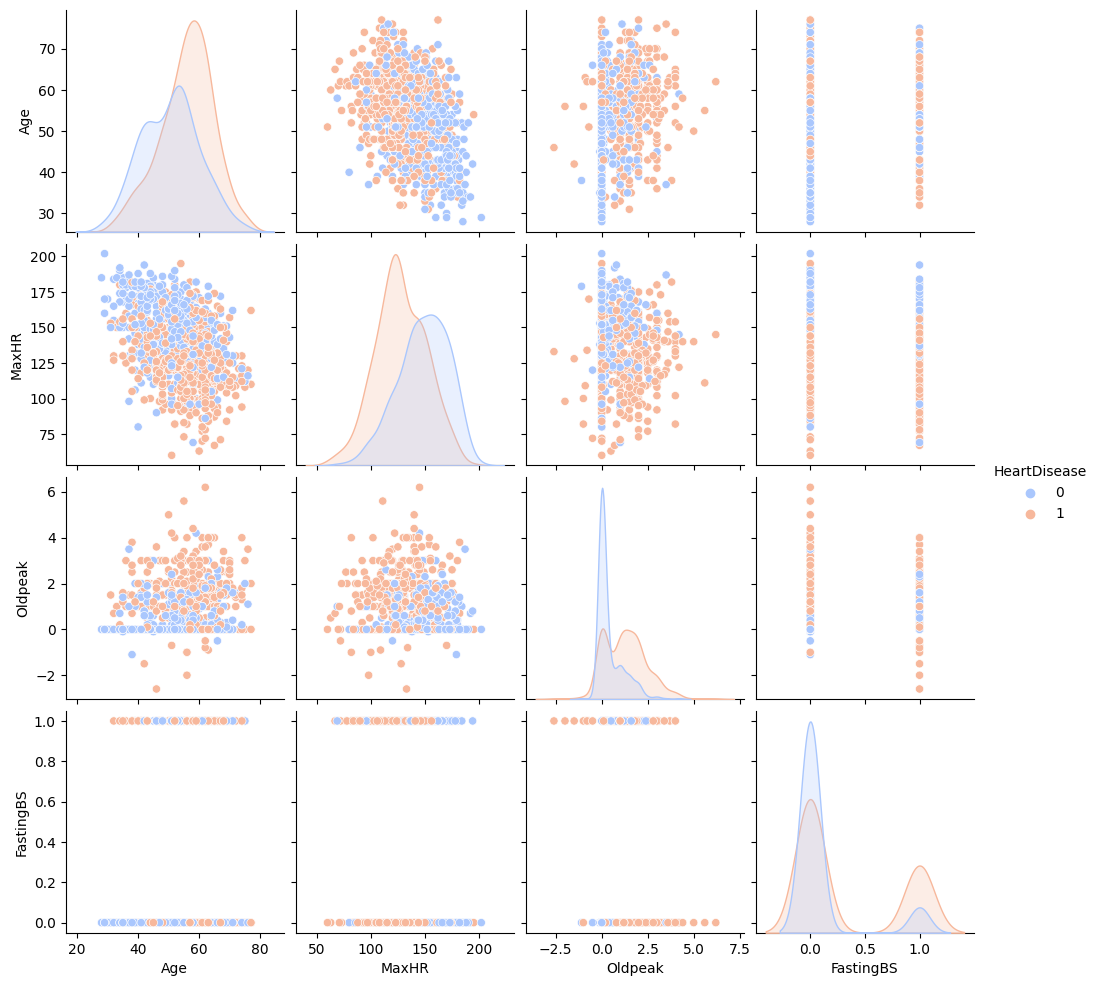

In [16]:
# Selecting key features for pairwise analysis
selected_features = ['Age', 'MaxHR', 'Oldpeak', 'FastingBS', 'HeartDisease']

# Creating the pairplot
sns.pairplot(df[selected_features], hue='HeartDisease', diag_kind='kde', palette='coolwarm')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

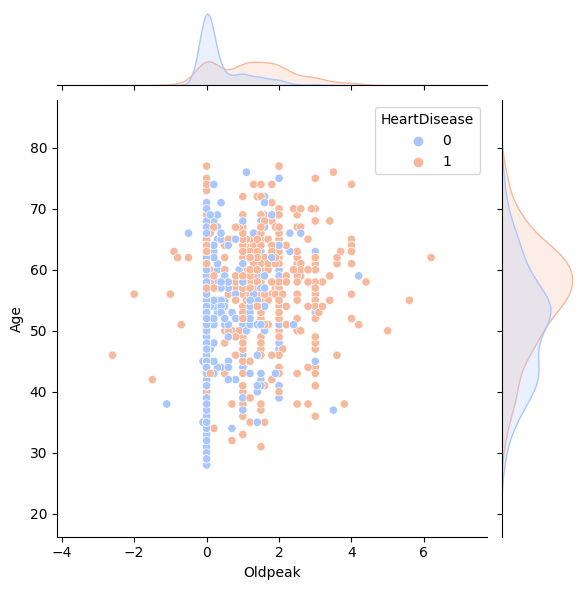

In [17]:
sns.jointplot(x='Oldpeak', y='Age', data=df, kind='scatter', hue='HeartDisease', palette='coolwarm')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

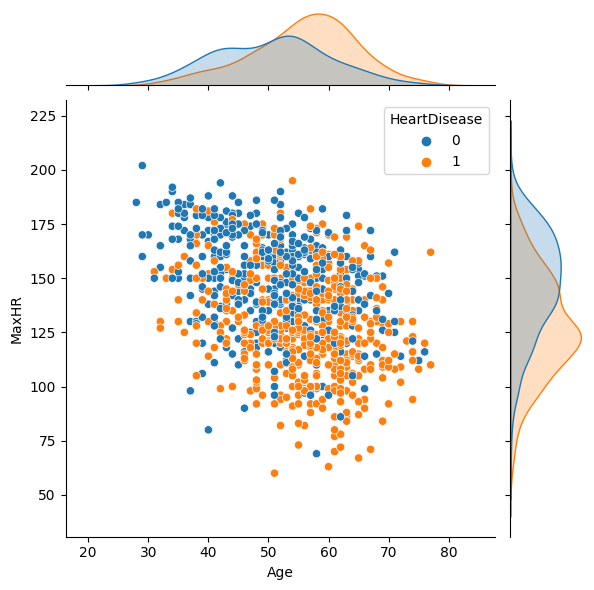

In [18]:
sns.jointplot(x='Age', y='MaxHR', data=df, kind='scatter',hue='HeartDisease', color='blue')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

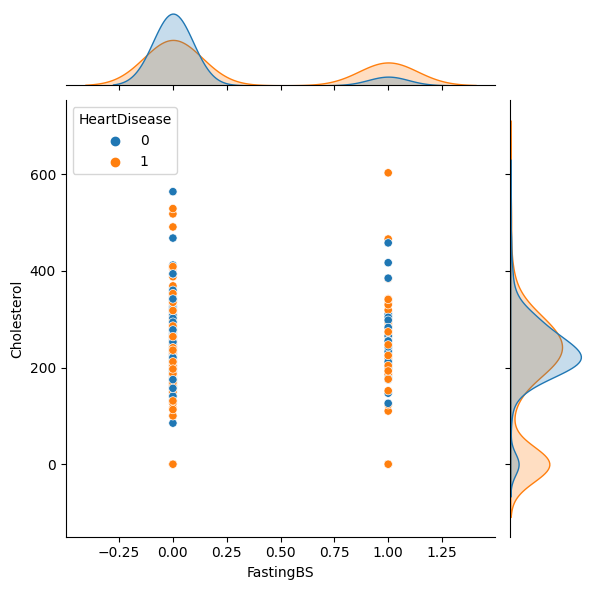

In [19]:
sns.jointplot(x='FastingBS', y='Cholesterol', data=df, kind='scatter',hue='HeartDisease', color='green')
plt.show()

## Conclusion & Next Steps
* Oldpeak and MaxHR are the strongest predictors of heart disease based on visual separation.
* Older patients have lower MaxHR, which should be accounted for when diagnosing.
* Higher fasting blood sugar might be linked with metabolic syndromes, affecting cholesterol levels.

# Evaluation

## Step 1 : Data Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode all columns with LabelEncoder (this converts categorical values to numeric)
df = df.apply(LabelEncoder().fit_transform)

# Split data into features (X) and target (y)
X = df.drop(columns=['HeartDisease'])  # All columns except the target
y = df['HeartDisease']  # Target column

## Step 2: Logistic Regression Model

### Data Splitting & Scaling (for Logistic Regression)

In [21]:
# Split the data into train and test sets (stratified to preserve target class proportions)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Standardize the features for logistic regression (helps the model converge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* We split the data into 75% training and 25% testing.
* Logistic Regression benefits from scaling, so we standardize the features.

### Training, Predicting & Evaluating Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import plotly.express as px

# Initialize and train logistic regression with increased iterations if needed
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test_scaled)

# Print the classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# ROC-AUC Calculation for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)
print("Logistic Regression ROC-AUC:", roc_auc)

# Plot ROC Curve using Plotly Express
roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
fig = px.line(roc_data, x='False Positive Rate', y='True Positive Rate', 
              title=f'Logistic Regression ROC Curve (AUC = {roc_auc:.4f})',
              labels={'False Positive Rate': 'False Positive Rate', 'True Positive Rate': 'True Positive Rate'})
# Add the reference line for a random classifier
fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(dash='dash', color='grey'))
fig.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       103
           1       0.86      0.89      0.87       127

    accuracy                           0.86       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230

Logistic Regression ROC-AUC: 0.9003134316948246


* We train the Logistic Regression model on scaled data.
* The classification report shows precision, recall, and f1-score for each class.
* The ROC-AUC score is computed to assess the model's ability to distinguish between classes.
* A Plotly ROC curve is generated with a dashed diagonal representing a random classifier.

## Step 3: Decision Tree Model

### Training, Predicting & Evaluating Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Initialize and train the Decision Tree Classifier (limiting max_depth to control overfitting)
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Print the classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ROC-AUC Calculation for Decision Tree (if predict_proba is available)
if hasattr(dt_model, "predict_proba"):
    fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    print("Decision Tree ROC-AUC:", roc_auc_dt)
    
    # Optional: Plot ROC Curve using Plotly Express for Decision Tree
    roc_data_dt = pd.DataFrame({'False Positive Rate': fpr_dt, 'True Positive Rate': tpr_dt})
    fig_dt = px.line(roc_data_dt, x='False Positive Rate', y='True Positive Rate', 
                     title=f'Decision Tree ROC Curve (AUC = {roc_auc_dt:.4f})',
                     labels={'False Positive Rate': 'False Positive Rate', 'True Positive Rate': 'True Positive Rate'})
    fig_dt.add_shape(type='line', x0=0, y0=0, x1=1, y1=1, line=dict(dash='dash', color='grey'))
    fig_dt.show()



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.86      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230

Decision Tree ROC-AUC: 0.9079963305557679


* The Decision Tree is trained on the original (non-scaled) training data.
* We set max_depth=4 to reduce overfitting.
* A classification report for the Decision Tree model is printed.
* We calculate and print the ROC-AUC for the Decision Tree and optionally plot the ROC curve using Plotly.

### **Overall Insights:**
- **Performance:** Both models achieve high performance with accuracies around 85-86%.
- **Discriminative Ability:** The ROC-AUC values indicate strong discriminative power in both models (around 0.90-0.91), with the decision tree having a slight edge.
- **Balanced Results:** Logistic regression shows balanced performance across both classes, whereas the decision tree, while comparable, shows a minor difference in precision/recall for one of the classes.

In summary, either model could be acceptable based on these results, with the decision tree having a slight advantage in terms of ROC-AUC, which might be useful in scenarios where ranking of predictions is crucial.